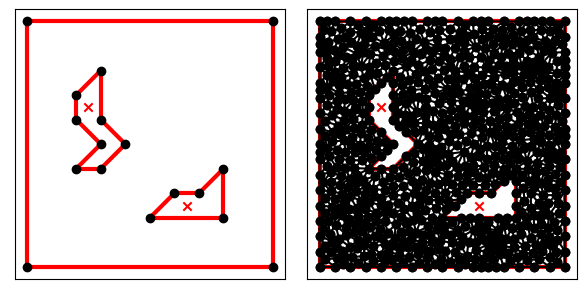

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr

pts0 = np.array(((0, 0), (10, 0), (10, 10), (0, 10))) #border
pts1 = np.array(((2, 4), (3, 4), (4, 5), (3, 6), (3,8), (2, 7), (2, 6), (3, 5))) #top-left tear 
pts2 = np.array(((5, 2), (8, 2), (8, 4), (7, 3), (6, 3))) #bottom-right tear

pts = np.vstack([pts0, pts1, pts2]) #combined

#connecting points together
seg0 = np.array(((0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 4), (12, 13), (13, 14), (14, 15), (15, 16), (16, 12)))

loop_backs = [3, 11, 16]

#form mesh
A = dict(vertices=pts, segments=seg0, holes=[[2.5,6.5], [6.5, 2.5]])
B = tr.triangulate(A, 'qpa0.1')
tr.compare(plt, A, B)

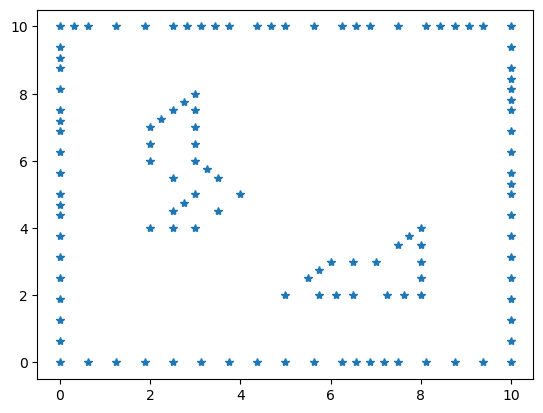

In [4]:
vm = B["vertex_markers"]
v = B['vertices']


#pts.shape

vm, _ = np.where(vm == 1)

plt.plot(v[vm, 0], v[vm, 1], "*")

In [5]:
obj = open("napkin.obj", "w")

for point in B['vertices']:
    obj.write(f'v {point[0]} {point[1]}  0\n')
obj.write('\n\n\n\n\n\n')
for triangle in B['triangles']:
    obj.write(f'f {triangle[0] + 1} {triangle[1] + 1} {triangle[2] + 1}\n')

obj.close()

In [3]:
import polyfempy as pf
import meshplot as mp

In [4]:
mesh_path = "napkin.obj"

In [5]:
settings = pf.Settings(
    discr_order=1,
    pde=pf.PDEs.LinearElasticity
)

In [6]:
settings.set_material_params("E", 210000)
settings.set_material_params("nu", 0.3)

In [7]:
problem = pf.Problem()

In [8]:
problem.set_x_symmetric(1) #Lock motion on x axis for side 1 (left side)
problem.set_y_symmetric(4) #Lock motion on y axis for side 4 (bottom side)
problem.set_force(3, [100, 0]) #apply a force of 100 to the right and 0 up on sie 3 (top side)

In [9]:
settings.problem = problem

In [10]:
solver = pf.Solver()

solver.settings(settings)
solver.load_mesh_from_path(mesh_path, normalize_mesh=True)

[2023-05-18 14:29:24.453] [polyfem] [info] Loading mesh...
[2023-05-18 14:29:24.453] [geogram] [info] Loading file napkin.obj...
[2023-05-18 14:29:24.498] [geogram] [info] (FP64) nb_v:792 nb_e:0 nb_f:1467 nb_b:119 tri:1 dim:3
[2023-05-18 14:29:24.498] [geogram] [info] Attributes on vertices: point[3]
[2023-05-18 14:29:24.505] [polyfem] [info] mesh bb min [0, 0], max [1, 1]
[2023-05-18 14:29:24.505] [polyfem] [info]  took 0.0524545s


In [11]:
solver.solve()

[2023-05-18 14:29:28.943] [polyfem] [info] simplex_count: 	1467
[2023-05-18 14:29:28.943] [polyfem] [info] regular_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] regular_boundary_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] simple_singular_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] multi_singular_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] boundary_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] multi_singular_boundary_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] non_regular_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] non_regular_boundary_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] undefined_count: 	0
[2023-05-18 14:29:28.943] [polyfem] [info] total count:	 1467
[2023-05-18 14:29:28.944] [polyfem] [info] Building isoparametric basis...
[2023-05-18 14:29:28.956] [polyfem] [info] Computing polygonal basis...
[2023-05-18 14:29:28.956] [polyfem] [info]  took 7.37e-05s
[2023-05-18 14:29:28.957] [polyfem] [info] hmin: 0.0279387


In [12]:
pts, tets, disp = solver.get_sampled_solution()
vertices = pts + 5*disp
mises, _ = solver.get_sampled_mises_avg()

In [13]:
mp.plot(vertices, tets, mises, return_plot=True)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5018301…